In [186]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from sklearn.linear_model import LinearRegression

\begin{equation}
\sigma_1^2 \equiv \epsilon \beta_1 \stackrel{e q \cdot(23)}{=} m_{11}^2 \cdot\left(\epsilon \beta_0\right)-2 m_{11} \cdot m_{12} \cdot\left(\epsilon \alpha_0\right)+m_{12}^2 \cdot\left(\epsilon \gamma_0\right)
\end{equation}

# EXPERIMENT 

0.2602237204808138
0.0011203743613505618
ideal -47.79575621234005
0.25374917911616923  \pm  0.004611657142990514
ideal -18.696489495736714
0.4004997333090131  \pm  0.006068668851293528
ideal 2.074404807858121
0.41078823262527797  \pm  0.006302380721213756
ideal 30.927725721878417


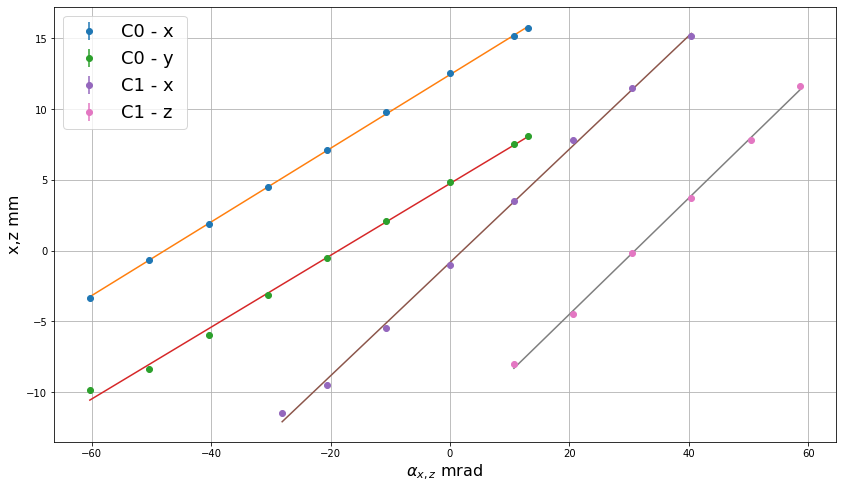

In [187]:
# Corrector 0 
#---------------

alphax=np.array([-60.3,-50.4,-40.4,-30.5,-20.6,-10.7,0.0,10.7,13.1])  # unit mrad
xcurrent=np.array([-0.197,-0.165,-0.133,-0.100,-0.067,-0.035,0,0.035,0.043]) # unit A
x=np.array([-3.320,-0.680,1.90,4.530,7.110,9.77,12.540,15.140,15.740])
xerrors=np.array([0.0057,0.0056,0.0056,0.0056,0.0057,0.0057,0.0055,0.0114,0.0184])

alphay=alphax
ycurrent=xcurrent
y=np.array([-9.87,-8.390,-5.940,-3.160,-0.530,2.110,4.850,7.510,8.134])
yerrors=np.array([0.0042,0.0053,0.0052,0.0051,0.0050,0.0049,0.0047,0.0045,0.0045])


def linearfit(x,a,b):
    
    return a*x+b

popt6, pcov6= curve_fit(linearfit,alphax,x)
plt.figure(figsize=(14,8))
plt.errorbar(alphax,x,xerrors,fmt='o',label="C0 - x ")
plt.plot(alphax, linearfit(alphax, *popt6))

print(popt6[0])
print(np.sqrt(pcov6[0][0]))
print("ideal",-popt6[1]/popt6[0])

popt6, pcov6= curve_fit(linearfit,alphay,y)
plt.errorbar(alphay,y,yerrors,fmt='o',label="C0 - y ")
plt.plot(alphay, linearfit(alphay, *popt6))
print(popt6[0], " \pm ", np.sqrt(pcov6[0][0]))
print("ideal",-popt6[1]/popt6[0])



# Corrector 1
#---------------
c1alphax=np.array([-28.1,-20.6,-10.7,0.0,10.7,20.6,30.5,40.4])  # unit mrad
c1xcurrent=np.array([-0.092,-0.067,-0.035,0,0.035,0.068,0.100,0.132]) # unit A
c1x=np.array([-11.480,-9.520,-5.480,-1,3.520,7.810,11.4950,15.15])
c1xerrors=np.array([0.0100,0.0110,0.0130,0.0134,0.0141,0.0138,0.0160,0.035])

popt6, pcov6= curve_fit(linearfit,c1alphax,c1x)
plt.errorbar(c1alphax,c1x,c1xerrors,fmt='o',label="C1 - x ")
plt.plot(c1alphax, linearfit(c1alphax, *popt6))
print(popt6[0], " \pm ", np.sqrt(pcov6[0][0]))
print("ideal",-popt6[1]/popt6[0])

c1alphay=np.array([10.7,20.6,30.5,40.4,50.4,58.6])  # unit mrad
c1ycurrent=np.array([0.068,0.100,0.132,0.165,0.192]) # unit A
c1y=np.array([-8.040,-4.480,-0.170,3.750,7.820,11.65])
c1yerrors=np.array([0.0084,0.0106,0.0125,0.0112,0.0120,0.044])

popt6, pcov6= curve_fit(linearfit,c1alphay,c1y)
plt.errorbar(c1alphay,c1y,c1yerrors,fmt='o',label="C1 - z ")
plt.plot(c1alphay, linearfit(c1alphay, *popt6))
plt.legend(fontsize=18)
print(popt6[0], " \pm ", np.sqrt(pcov6[0][0]))
print("ideal",-popt6[1]/popt6[0])
plt.xlabel(r"$\alpha_{x,z} $ mrad",fontsize=16)
plt.ylabel("x,z mm",fontsize=16)
plt.grid()

VALUES are set : 
Corrector 0 : ax=-47.8 ay=-18.8 mrad
Corrector 1 : ax= 2.5, ay= 29.8 mrad # Ay degerini 31 almak lazimken 29.8 aldik cunku beam tam ortaya gelmiyordu.


# BEAM BASED ALIGNMENT 

In [188]:
def error(x,dx,y,dy):
    
    return x/y,(x/y)*np.sqrt((dx/x)**2+(dy/y)**2)

import scipy

ideal -41.33219110490387 \pm (-41.33219110490387, -4.5706670795275945)
[ 0.85374156 35.28700938]
[[0.06814954 0.42899042]
 [0.42899042 2.70050469]]
[[4.64436030e-03 1.84032778e-01]
 [1.84032778e-01 7.29272560e+00]]


Power_divergenceResult(statistic=0.0022345115818376217, pvalue=0.9999719261736304)

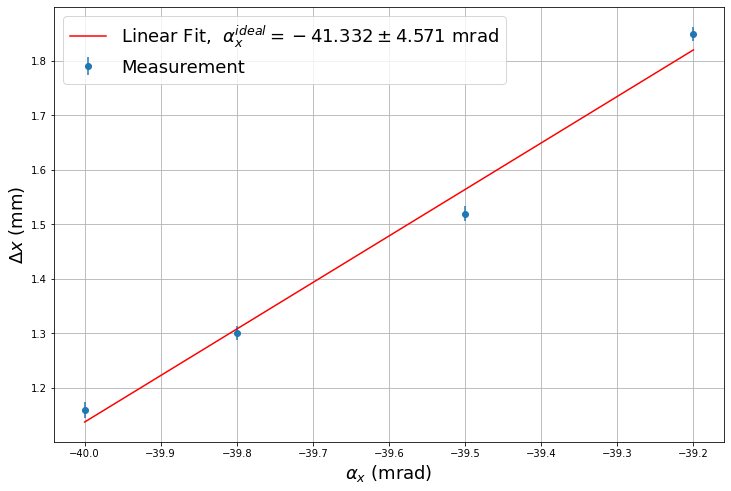

In [189]:
# Corrector 0
ax=np.array([-40.0,-39.8,-39.5,-39.2])
Dx=np.array([1.16,1.30,1.52,1.85])
Dxerrors=np.array([0.015,0.013,0.014,0.013]) 

ay=np.array([-9.3,-9.5,-9.0,-8.8,-8.7])
Dy=np.array([0.6,0.4, 0.87,1.03,1.15])
Dyerrors=np.array([0.016,0.016,0.016,0.016,0.016])


plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(linearfit,ax,Dx)
plt.errorbar(ax,Dx,Dxerrors,fmt='o',label="Measurement")
plt.plot(ax, linearfit(ax, *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}= -41.332 \pm 4.571$ mrad")

plt.ylabel(r"$\Delta x$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_x$ (mrad)", fontsize=18)
plt.grid()
plt.legend(fontsize=18)
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))

print(popt6)
print(np.sqrt(pcov6))
print((pcov6))
scipy.stats.chisquare(Dx, linearfit(ax, *popt6))

ideal -9.94434782739093 \pm (-9.94434782739093, -0.3103939172847177)
[0.9159292  9.10831857]
[[0.00044639 0.00404433]
 [0.00404433 0.03668195]]


Power_divergenceResult(statistic=-120.7252553657022, pvalue=1.0)

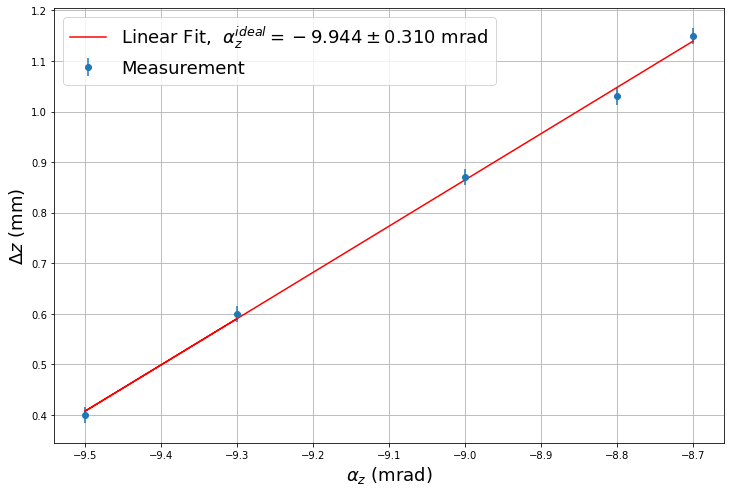

In [190]:
plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(linearfit,ay,Dy)
plt.errorbar(ay,Dy,Dyerrors,fmt='o',label="Measurement")
plt.plot(ay, linearfit(ay, *popt6),c='red',label=r"Linear Fit,  $\alpha_z^{ideal}= -9.944 \pm 0.310$ mrad")
plt.ylabel(r"$\Delta z$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_z$ (mrad)", fontsize=18)
plt.grid()
plt.legend(fontsize=18)
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))



print(popt6)
print(pcov6)
scipy.stats.chisquare(Dx, linearfit(ax, *popt6))

ideal -11.084946298648806 \pm (-11.084946298648806, -4.153391611458291)
[0.87908629 9.74462437]
[[0.0572488  0.59996739]
 [0.59996739 6.29668071]]


Power_divergenceResult(statistic=0.7896120651777246, pvalue=0.9398352625130522)

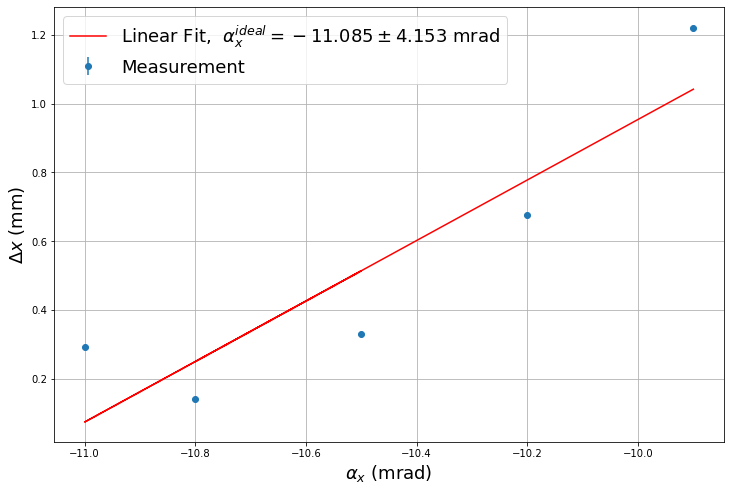

In [191]:
# Corrector 1
plt.figure(figsize=(12,8))
ax=np.array([-10.8,-10.5,-11.0,-10.2,-9.9])
Dx=np.array([0.142,0.330,0.292,0.675,1.22])
Dxerrors=np.array([0.0030,0.0033,0.0033,0.0030,0.0033]) 

ay=np.array([12.4,11.6,10.5,10.1,9.3])
Dy=np.array([0.0480,0.29,0.475,1.278,1.818])
Dyerrors=np.array([0.006,0.06,0.06,0.006,0.06])



popt6, pcov6= curve_fit(linearfit,ax,Dx)
plt.errorbar(ax,Dx,Dxerrors,fmt='o',label="Measurement")
plt.plot(ax, linearfit(ax, *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}=  -11.085 \pm 4.153$ mrad")
plt.ylabel(r"$\Delta x$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_x$ (mrad)", fontsize=18)
plt.grid()
plt.legend(fontsize=18)
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))



print(popt6)
print(pcov6)
scipy.stats.chisquare(Dx, linearfit(ax, *popt6))

ideal 12.175476154769665 \pm (12.175476154769665, 3.7620186979835397)
[-0.56023888  6.82117514]
[[ 0.01672124 -0.18025494]
 [-0.18025494  1.96330731]]


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
22.86701507905874

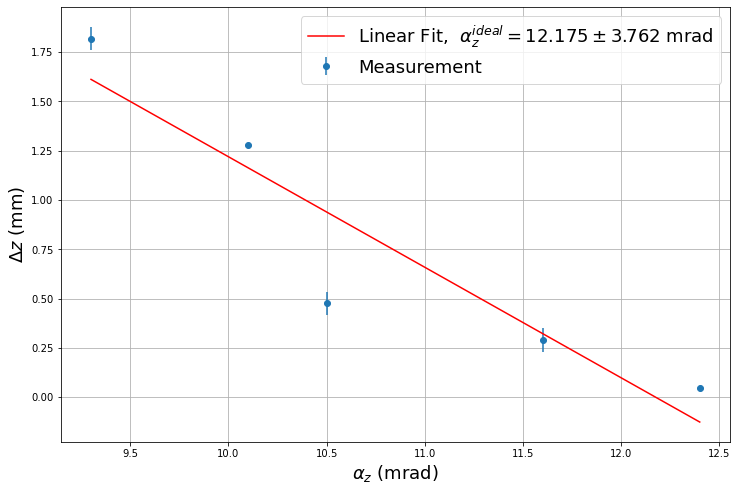

In [192]:
plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(linearfit,ay,Dy)
plt.errorbar(ay,Dy,Dyerrors,fmt='o',label="Measurement")
plt.plot(ay, linearfit(ay, *popt6),c='red',label=r"Linear Fit,  $\alpha_z^{ideal}=  12.175 \pm 3.762$ mrad")
plt.ylabel(r"$\Delta z$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_z$ (mrad)", fontsize=18)
plt.legend(fontsize=18)
plt.grid()
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))

print(popt6)
print(pcov6)
scipy.stats.chisquare(Dx, linearfit(ax, *popt6))

experimental choice = -10.8 for x

-0.2913010651870816  \pm  0.002063246361187084
ideal -31.31474824021778
ideal -31.31474824021778 \pm (-31.31474824021778, -7.57937656589296)
[-0.29130107 -9.12201952]
[[2.06324636e-03 7.65464401e-02]
 [7.65464401e-02 2.85148901e+00]]


Power_divergenceResult(statistic=0.06813748641025391, pvalue=0.9953651279552482)

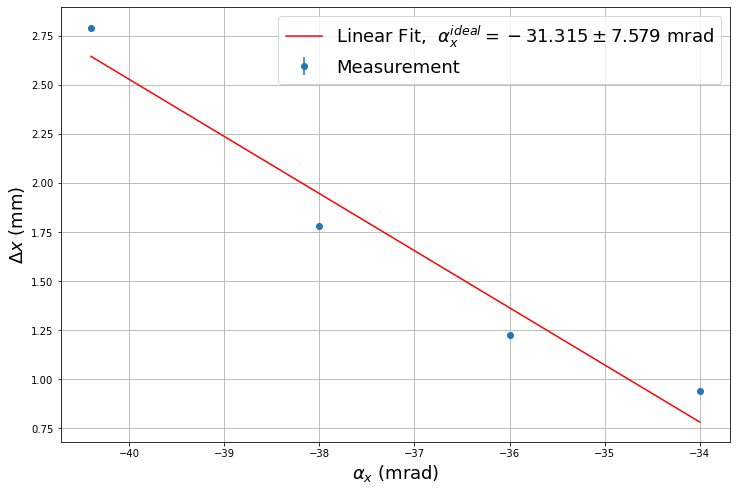

In [193]:
# Corrector 2
plt.figure(figsize=(12,8))
ax=np.array([-40.4,-38.0,-36.0,-34.0])
Dx=np.array([2.793,1.783,1.225,0.94])
Dxerrors=np.array([0.005,0.005,0.005,0.006]) 

ay=np.array([26.5,29.3,31.0,33.0,34.0])
Dy=np.array([1.437,1.811,2.154,2.283,2.66])
Dyerrors=np.array([0.015,0.015,0.015,0.015,0.015])

popt6, pcov6= curve_fit(linearfit,ax,Dx)
plt.errorbar(ax,Dx,Dxerrors,fmt='o',label="Measurement")
plt.plot(ax, linearfit(ax, *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}=  -31.315 \pm 7.579$ mrad")
print(popt6[0], " \pm ", pcov6[0][0])
print("ideal",-popt6[1]/popt6[0])
plt.ylabel(r"$\Delta x$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_x$ (mrad)", fontsize=18)

plt.grid()
plt.legend(fontsize=18)
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))



print(popt6)
print(pcov6)
scipy.stats.chisquare(Dx, linearfit(ax, *popt6))

ideal 17.23279364958963 \pm (17.23279364958963, 3.8330968637250864)
[ 0.15295102 -2.63577335]
[[ 0.00027491 -0.00845611]
 [-0.00845611  0.26208104]]


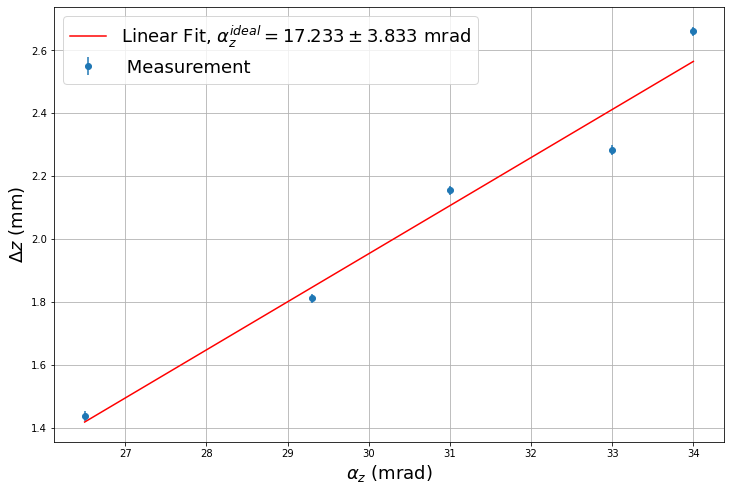

In [194]:

plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(linearfit,ay,Dy)
plt.errorbar(ay,Dy,Dyerrors,fmt='o',label=" Measurement")
plt.plot(ay, linearfit(ay, *popt6),c='red',label=r"Linear Fit, $\alpha_z^{ideal}=  17.233 \pm 3.833$ mrad")
plt.ylabel(r"$\Delta z$ (mm)", fontsize=18)
plt.xlabel(r"$\alpha_z$ (mrad)", fontsize=18)

plt.grid()
plt.legend(fontsize=18)
print("ideal",-popt6[1]/popt6[0], "\pm", error(-popt6[1],np.sqrt(pcov6[1][1]),popt6[0],np.sqrt(pcov6[0][0])))



print(popt6)
print(pcov6)

ideal 17.23279364958963


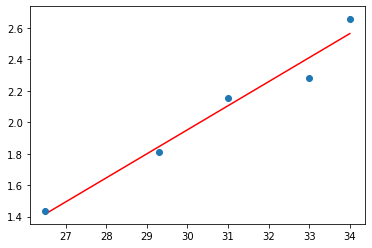

In [195]:
# Corrector 3
ax=np.array([])
Dx=np.array([])
Dxerrors=np.array([]) 

#ay=np.array([26.5,29.3,31.0,33.0,34.0])
#Dy=np.array([1.437,1.811,2.154,2.283,2.66])
#Dyerrors=np.array([0.015,0.015,0.015,0.015,0.015])

#popt6, pcov6= curve_fit(linearfit,ax,Dx)
#plt.errorbar(ax,Dx,Dxerrors,fmt='o',label="Fixed Detector Measurement")
#plt.plot(ax, linearfit(ax, *popt6),c='red',label="Linear Fit")
#print(popt6[0], " \pm ", pcov6[0][0])
#print("ideal",-popt6[1]/popt6[0])

popt6, pcov6= curve_fit(linearfit,ay,Dy)
plt.errorbar(ay,Dy,Dyerrors,fmt='o',label="Fixed Detector Measurement")
plt.plot(ay, linearfit(ay, *popt6),c='red',label="Linear Fit")
print("ideal",-popt6[1]/popt6[0])

# Quadrupole Scan

In [216]:
def Matrix(k):
    
    L=0.074
    omega=np.sqrt(k)*L

    
    
    M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                     [0, 1]])
    #M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
    #                 [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
    M2=np.array([[1,L],
                    [-k*L,1]])
    M3=np.array([[1,0.06+0.04+0.185+0.03925],
                     [0,1]])
    
    M=np.matmul(M1,np.matmul(M2,M3))
    
    return M[0][0],M[0][1],M[1][0],M[1][1]


def Matrixfunc(k,a,b,c):
    
    L=0.074
    omega=np.sqrt(np.abs(k))*L

    
    
    M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                 [0, 1]])
    M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
                     [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
    M2=np.array([[1,L],
                [-k*L,1]])
    M3=np.array([[1,0.06+0.04+0.185+0.03925],
                 [0,1]])
    
    M=np.matmul(M1,np.matmul(M2,M3))
    
    return (M[0][0])**2*a-(2*M[0][0]*M[0][1])*b+(M[0][1]**2)*c

(29,)
(29,)
[2.53258761 2.43946715 2.37128657 2.2877937  2.18906373 2.10475652
 2.00673865 1.93235607 1.79888855 1.68374582 1.56875747 1.42758537
 1.17643529 0.92897793 0.81344945 0.8096913  0.91956511 1.15801554
 1.27239931 1.43701079 1.53133928 1.64772571 1.78493697]
[1.80277564 1.58303506 1.39499104 1.26015872 1.19247641 1.12738636
 1.02761861 0.96197713 0.91923882 0.87424253 0.76967526 0.67646138
 0.67089492 0.78740079 0.98503807 1.06160256 1.08857705 1.13710158
 1.18025421 1.26055543 1.36784502 1.45464772 1.54790181 1.64073154
 1.713476   1.82920748 1.9318385  2.0189106  2.14032708]


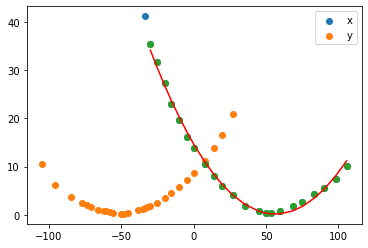

In [217]:
#S1

def polynomialfit(x,a,b,c):
    
    return a*x**2+b*x+c

kx=np.array([-34.0,-30,-25.7,-20.2,-15.8,-10.3,-4.7,0.4,7.5,14.2,19.8,26.9,35.6,45.1,50.2,53.4, 59.7,68.4,75.1,83.4,90.1,98.5,105.6])
sigx=np.array([6.414,5.951,5.623,5.234,4.792,4.430,4.027,3.734,3.236,2.835,2.461,2.038, 1.384,0.863,0.6617,0.6556,0.8456,1.341, 1.619,2.065,2.345,2.715,3.186])
errsigx=np.array([0.181,0.177,0.0172,0.0166,0.0158,0.0151,0.0141,0.0132,0.0116,0.0102,0.0089,0.0073,0.00249,0.0052,0.00278,0.0238,0.00249,0.0034,0.0042]) 

plt.scatter(kx,sigx**2,label="x")

ky=np.array([-104.8,-95.7,-84.6,-77.5,-73.5,-70.8,-66.4,-62.1,-60.5,-58.1,-55.7,-50.2,-48.2,-45.5,-38.4,-35.2,-34.0,-32.0,-30,-25.7,-20.2,-15.8,-10.3,-4.7,0.4,7.5,14.2,19.8,26.9])
sigy=np.array([3.250,2.506,1.946,1.588,1.422,1.271,1.056,0.9254,0.845,0.7643,0.5924,0.4576,0.4501,0.62,0.9703,1.127,1.185,1.293,1.393,1.589,1.871,2.116,2.396,2.692,2.936,3.346,3.732,4.076,4.581])
errsigy=([0.0172,0.0118,0.0076,0.059,0.049,0.0042,0.0033,0.00276,0.00252,0.00220,0.00171,0.00147,0.0149,0.00182,0.00293,0.0035,0.0037,0.0043,0.004,0.0050,0.0059,0.0070,0.0083,0.0092,0.0106,0.0122,0.0136,0.0152])
print(ky.shape)
print(sigy.shape)
plt.scatter(ky,sigy**2,label="y")
plt.legend()

popt6, pcov6= curve_fit(polynomialfit,kx[1:],(sigx**2)[1:])
plt.scatter(kx[1:],(sigx**2)[1:],label="Measurement")
plt.plot(kx[1:], polynomialfit(kx[1:], *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}=  -31.315 \pm 3.523$ mrad")

print(np.sqrt(sigx))
print(np.sqrt(sigy))

In [218]:

np.size(sigy)

29

[ 1.03916051 -2.35191467 12.7160929 ]
[[0.00275153 0.00639293 0.01045177]
 [0.00639293 0.04462414 0.09657894]
 [0.01045177 0.09657894 0.25924609]]
emittance 2.7717429431447087
1.0391605071604486 0.052455047360484
-2.3519146681950915 0.21124426796393175
12.716092902194406 0.5091621499715752
0.2360462628286489
1.2210073894797495


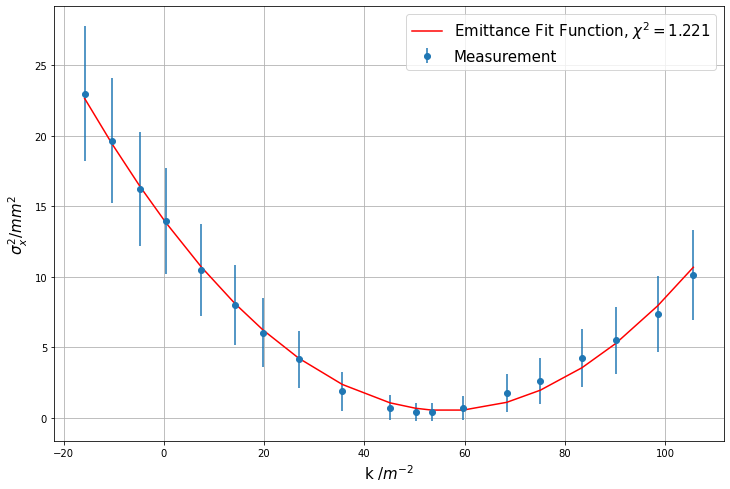

In [219]:
def ourfit(x,a,b,c):    
    L=0.074
    m11=[]
    m12=[]
    m21=[]
    m22=[]
    for i in range(len(x)):
        k=x[i]
        omega=np.sqrt(np.abs(k))*L
    
        M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                     [0, 1]])

        #M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
        #             [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
        M2=np.array([[1,L],
                     [-k*L,1]])
        M3=np.array([[1,0.06+0.04+0.185+0.03925],
                     [0,1]])
        #M3=np.array([[1,0.06+0.02],
        #             [0,1]])
        M=np.matmul(M1,np.matmul(M2,M3))
      
        m11.append(M[0][0])
        m12.append(M[0][1])
        m21.append(M[1][0])
        m22.append(M[1][1])
    
    return ((np.array(m11))**2)*a-2*(np.array(m11))*(np.array(m12))*b+(np.array(m12))**2*c

plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(ourfit,kx[4:],(sigx**2)[4:])
plt.errorbar(kx[4:],(sigx**2)[4:],np.sqrt((sigx**2)[4:]),fmt='o',label="Measurement")
plt.plot(kx[4:], ourfit(kx[4:], *popt6),c='red',label=r"Emittance Fit Function, $\chi^2=1.221$")
plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{x}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)



print(popt6)
print(pcov6)
print("emittance", np.sqrt(popt6[0]*popt6[2]-popt6[1]**2))

emittance=np.sqrt(popt6[0]*popt6[2]-popt6[1]**2)
a=popt6[0]
b=popt6[1]
c=popt6[2]
Da=np.sqrt(pcov6[0][0])
Db=np.sqrt(pcov6[1][1])
Dc=np.sqrt(pcov6[2][2])

print(a,Da)
print(b,Db)
print(c,Dc)

error=np.sqrt((1/4)*(Da**2)*((c/emittance)**2)+(1/4)*(Dc**2)*((a/emittance)**2)+((b/emittance)**2)*(Db**2))
print(error)
print(scipy.stats.chisquare((sigx**2)[4:], ourfit(kx[4:], *popt6))[0])

56.564176278663794 0.5294092935044272
56.564176278663794 1.3452535412781725
0.5294092935044272 0.6890499546144654
(-0.860565450334088, 0.2394616527291719, -4.1857490446211205, -0.35722912771839854)
2.743895360376699
1.2210073890046549
0.004221033775880299 7.741991949676035e-05
-0.47751859715417416 0.0072295061071988385
14.034632346388902 0.14954286132688183
2.743895360376699
56.564176278663794 1.3452535412781725
0.5294092935044272 0.5009447994860338
56.564176278663794 1.3452535412781725
0.5294092935044272 0.9039276098935624
0.5294092935044272 0.5009447994860338
2.7504861172003103


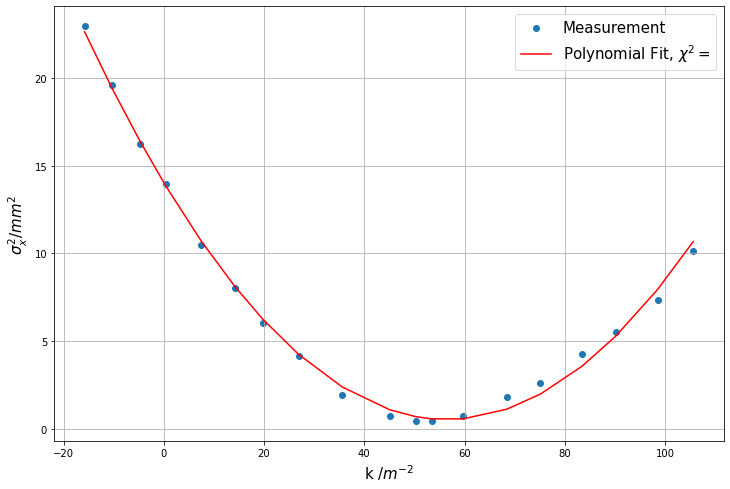

In [220]:
#POLYNOMIAL FIT
plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(polynomialfit,kx[4:],(sigx**2)[4:])
plt.scatter(kx[4:],(sigx**2)[4:],label="Measurement")
plt.plot(kx[4:], polynomialfit(kx[4:], *popt6),c='red',label=r"Polynomial Fit, $\chi^2=$")
kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]
print(kmin,beamwidth)

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)

aa=popt6[0]
bb=popt6[1]
cc=popt6[2]
Daa=np.sqrt(pcov6[0][0])
Dbb=np.sqrt(pcov6[1][1])
Dcc=np.sqrt(pcov6[2][2])
Dbeamwidth=np.sqrt((-Dbb/(4*aa))**2+(Daa*bb/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)

Mat=Matrix(kmin)
print(Mat)

em2=np.sqrt(beamwidth**2*((Mat[2]**2)*a-2*Mat[2]*Mat[3]*b+(Mat[3]**2)*c))
print(em2)

plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{x}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)

print(scipy.stats.chisquare((sigx**2)[4:], polynomialfit(kx[4:], *popt6))[0])
print(aa,Daa)
print(bb,Dbb)
print(cc,Dcc)


print(em2)

kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)
Dbeamwidth=np.sqrt((-Dbb*bb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)

print(beamwidth,Dbeamwidth)

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)
Dbeamwidth=np.sqrt((-Dbb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)
Dbeamwidth=np.sqrt((-Dbb*bb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)

#Dbeamwidth=0.1*Dbeamwidth
w1=em2*Dbeamwidth/beamwidth
w2=(beamwidth**2)*(Mat[2]**2)/(em2*2)
w3=((beamwidth**2)*Mat[2]*Mat[3])/(em2)
w4=((beamwidth**2)*Mat[3]*Mat[3])/(2*em2)

print(np.sqrt(w1**2+w2**2+w3**2+w4**2))


# ky

[ 1.14547892 -1.91747368  6.3060339 ]
[[0.00112938 0.00135926 0.00120619]
 [0.00135926 0.0100776  0.02342596]
 [0.00120619 0.02342596 0.07101319]]
emittance 1.8832747004236459
0.14205800785913436
0.4553008801528433
1.14547892052475 0.03360621267620568
-1.91747367747743 0.10038724198521964
6.306033896953338 0.2664830051395795


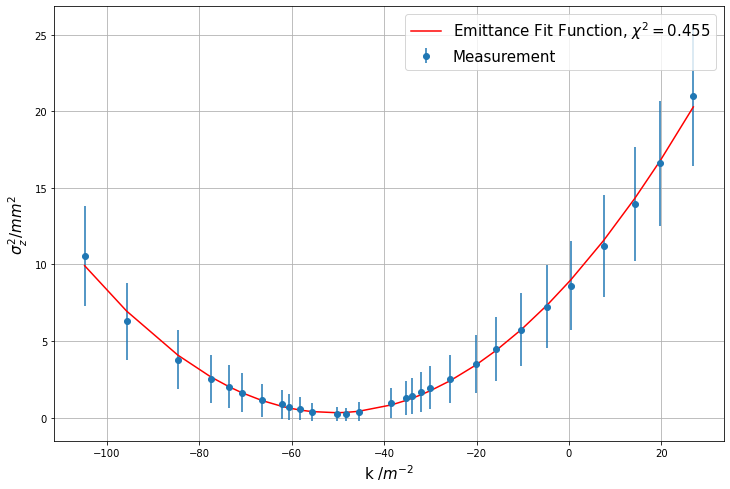

In [221]:
def ourfit(x,a,b,c):    
    L=0.074
    m11=[]
    m12=[]
    m21=[]
    m22=[]
    for i in range(len(x)):
        k=x[i]
        omega=np.sqrt(np.abs(k))*L
    
        M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                     [0, 1]])

        #M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
        #             [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
        M2=np.array([[1,L],
                     [k*L,1]])
        M3=np.array([[1,0.06+0.04+0.185+0.03925],
                     [0,1]])
        M=np.matmul(M1,np.matmul(M2,M3))
      
        m11.append(M[0][0])
        m12.append(M[0][1])
        m21.append(M[1][0])
        m22.append(M[1][1])
    
    return ((np.array(m11))**2)*a-2*(np.array(m11))*(np.array(m12))*b+(np.array(m12))**2*c



ky=np.array([-104.8,-95.7,-84.6,-77.5,-73.5,-70.8,-66.4,-62.1,-60.5,-58.1,-55.7,-50.2,-48.2,-45.5,-38.4,-35.2,-34.0,-32.0,-30,-25.7,-20.2,-15.8,-10.3,-4.7,0.4,7.5,14.2,19.8,26.9])
sigy=np.array([3.250,2.506,1.946,1.588,1.422,1.271,1.056,0.9254,0.845,0.7643,0.5924,0.4576,0.4501,0.62,0.9703,1.127,1.185,1.293,1.393,1.589,1.871,2.116,2.396,2.692,2.936,3.346,3.732,4.076,4.581])
errsigy=([0.0172,0.0118,0.0076,0.059,0.049,0.0042,0.0033,0.00276,0.00252,0.00220,0.00171,0.00147,0.0149,0.00182,0.00293,0.0035,0.0037,0.0043,0.004,0.0050,0.0059,0.0070,0.0083,0.0092,0.0106,0.0122,0.0136,0.0152])

plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(ourfit,ky[:],(sigy**2)[:])
plt.errorbar(ky[:],(sigy**2)[:],np.sqrt((sigy**2)[:]),fmt='o',label="Measurement")
plt.plot(ky[:], ourfit(ky[:], *popt6),c='red',label=r"Emittance Fit Function, $\chi^2=0.455$")

print(popt6)
print(pcov6)
print("emittance", np.sqrt(popt6[0]*popt6[2]-popt6[1]**2))

emittance=np.sqrt(popt6[0]*popt6[2]-popt6[1]**2)
a=popt6[0]
b=popt6[1]
c=popt6[2]
Da=np.sqrt(pcov6[0][0])
Db=np.sqrt(pcov6[1][1])
Dc=np.sqrt(pcov6[2][2])



error=np.sqrt((1/4)*(Da**2)*((c/emittance)**2)+(1/4)*(Dc**2)*((a/emittance)**2)+((b/emittance)**2)*(Db**2))
print(error)

plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{z}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)
print(scipy.stats.chisquare((sigy**2), ourfit(ky, *popt6))[0])


print(a,Da)
print(b,Db)
print(c,Dc)

-50.86617964252522 0.31242469088036096
(2.673141246981582, 1.385266049333778, 3.764097293546866, 2.2205085474325714)
2.783488867820099
0.003302071616521242 4.118137090040892e-05
0.33592753607690623 0.0034198809313011644
8.856099889359752 0.0813941161727561
-50.86617964252522 0.8188917441906546
0.31242469088036096 0.21963374821361586
1.9960222231329008


/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3290/3663203587.py:4: RuntimeWarning: invalid value encountered in sqrt
  omega=np.sqrt(k)*L


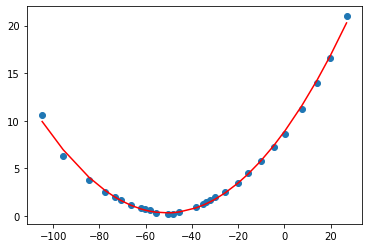

In [222]:
#POLYNOMIAL FIT
popt6, pcov6= curve_fit(polynomialfit,ky[:],(sigy**2)[:])
plt.scatter(ky[:],(sigy**2)[:],label="Measurement")
plt.plot(ky[:], polynomialfit(ky[:], *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}=  -31.315 \pm 3.523$ mrad")

kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]
print(kmin,beamwidth)

Mat=Matrix(kmin)
print(Mat)

em2=np.sqrt(beamwidth**2*((Mat[2]**2)*a-2*Mat[2]*Mat[3]*b+(Mat[3]**2)*c))
print(em2)


aa=popt6[0]
bb=popt6[1]
cc=popt6[2]
Daa=np.sqrt(pcov6[0][0])
Dbb=np.sqrt(pcov6[1][1])
Dcc=np.sqrt(pcov6[2][2])
print(aa,Daa)
print(bb,Dbb)
print(cc,Dcc)
kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)
Dbeamwidth=np.sqrt((-Dbb*bb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)

print(beamwidth,Dbeamwidth)

#Dbeamwidth=0.1*Dbeamwidth
w1=em2*Dbeamwidth/beamwidth
w2=(beamwidth**2)*(Mat[2]**2)/(em2*2)
w3=((beamwidth**2)*Mat[2]*Mat[3])/(em2)
w4=((beamwidth**2)*Mat[3]*Mat[3])/(2*em2)

print(np.sqrt(w1**2+w2**2+w3**2+w4**2))

[3.29241553 3.43511281 3.20780299 3.02985148 2.74408455 2.41660919
 2.079423   1.83193886 1.76323566 1.48862353 1.37477271 1.11758669
 0.85440037 0.84616783 0.96020831 1.14236597 1.31833228 1.49532605
 1.61183126 1.77482393 1.92093727]
[1.65348118 1.46116392 1.33491573 1.29344501 1.31719399 1.16790411
 1.03633971 0.94657277 0.82885463 0.77653075 0.77556431 0.97519229
 1.07563934 1.15152073 1.28607931 1.41527383 1.51756384 1.71901134
 1.91232842 1.99148186 2.03371581 2.08734281 2.26495033]


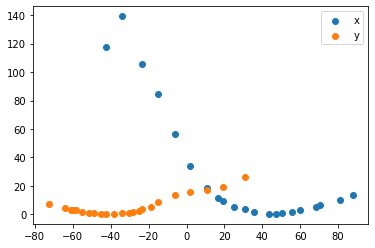

In [223]:
#S2
kx=np.array([-42.7,-34.0,-23.3,-15.0,-6.3,2.0,10.7,  16.6 ,19.4,25.3,30.8,    35.6,43.5, 47.4,  50.2 ,55.7,59.7,68.4,70.4,81.1,87.8])
sigx=np.array([10.84,11.8,10.29,9.18,7.53,5.84,4.324,  3.356 ,3.109,2.216,1.890,   1.249,0.730,0.716,0.922   ,1.305,1.738,2.236,2.598,3.15,3.69])
errsigx=([0.087,0.073,0.057,0.046,0.038,0.032,0.0258,0.0189, 0.0203 ,0.0113,0.0135,0.0039,   0.0068,0.0038,0.0053  ,0.0089,0.0131,0.0236,0.0254,0.037,0.050])
plt.scatter(kx,np.array(sigx)**2,label="x")

ky=np.array([-72.8,-64.1,-60.9, -58.1,-59.7,-55.4,    -51.4, -48.6   ,-45.1,-42.7,-38.4  ,-34.0,-30.4,-28.1,-25.3  ,-23.3,-18.6  ,-15.0,-6.3,2.0,10.7,19.4,30.8])
sigy=np.array([2.734,2.135,1.782, 1.673,1.735,1.364, 1.074, 0.896    ,0.687,0.603,0.6015   ,0.951,1.157,1.326,1.654   ,2.003,2.303  ,2.955,3.657,3.966,4.136,4.357,5.13])
errsigy=([0.0167,0.0113,0.0096,0.0084 ,0.0088,0.0066,   0.0055,0.0041   ,0.0036,0.0033,0.00242  ,0.0037,0.0043,0.0051,0.0066  ,0.0086,0.0101   ,0.0138,0.0182,0.0215,0.0263,0.0299,0.036])
plt.scatter(ky,np.array(sigy)**2,label="y")
plt.legend()

print(np.sqrt(sigx))
print(np.sqrt(sigy))

[ 3.22407183  4.21636797 15.08630437]
[[1.29697164 1.33815815 0.88635441]
 [1.33815815 1.50601247 1.22917928]
 [0.88635441 1.22917928 1.56173503]]
emittance 5.5553190850733385
1.8412638916716153
2.648758900180442
3.2240718317812815 1.1388466291862258
4.216367967041644 1.227196996783341
15.086304371699436 1.2496939761823662


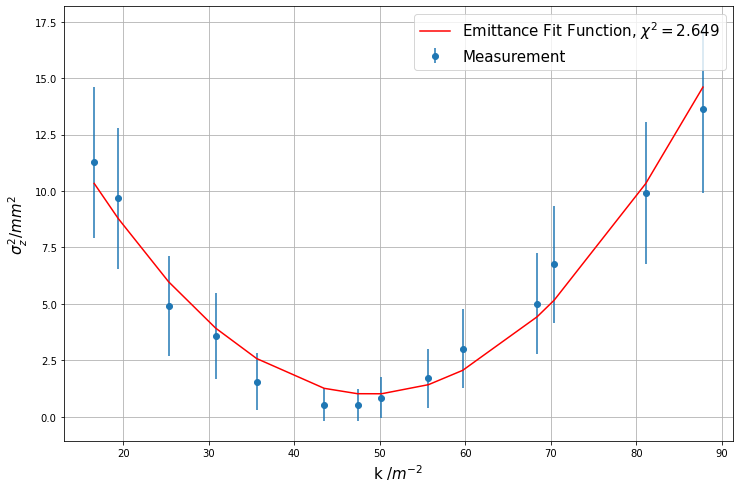

In [224]:
def ourfit(x,a,b,c):    
    L=0.074
    m11=[]
    m12=[]
    m21=[]
    m22=[]
    for i in range(len(x)):
        k=x[i]
        omega=np.sqrt(np.abs(k))*L
    
        M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                     [0, 1]])

        #M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
        #             [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
        M2=np.array([[1,L],
                     [-k*L,1]])
        M3=np.array([[1,0.06+0.04+0.316+0.03925*2+0.03+0.074+0.06+0.04+0.185+0.03925],
                     [0,1]])
        M=np.matmul(M1,np.matmul(M2,M3))
      
        m11.append(M[0][0])
        m12.append(M[0][1])
        m21.append(M[1][0])
        m22.append(M[1][1])
    
    return ((np.array(m11))**2)*a-2*(np.array(m11))*(np.array(m12))*b+(np.array(m12))**2*c

plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(ourfit,kx[7:],(sigx**2)[7:])
plt.errorbar(kx[7:],(sigx**2)[7:],np.sqrt((sigx**2)[7:]),fmt='o',label="Measurement")
plt.plot(kx[7:], ourfit(kx[7:], *popt6),c='red',label=r"Emittance Fit Function, $\chi^2=2.649$")

print(popt6)
print(pcov6)
print("emittance", np.sqrt(popt6[0]*popt6[2]-popt6[1]**2))

emittance=np.sqrt(popt6[0]*popt6[2]-popt6[1]**2)
a=popt6[0]
b=popt6[1]
c=popt6[2]
Da=np.sqrt(pcov6[0][0])
Db=np.sqrt(pcov6[1][1])
Dc=np.sqrt(pcov6[2][2])

error=np.sqrt((1/4)*(Da**2)*((c/emittance)**2)+(1/4)*(Dc**2)*((a/emittance)**2)+((b/emittance)**2)*(Db**2))
print(error)

plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{z}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)
print(scipy.stats.chisquare(((sigx**2)[7:]), ourfit(kx[7:], *popt6))[0])

print(a,Da)
print(b,Db)
print(c,Dc)

48.85837751822381 1.001041274261663
48.85837751822381 4.437766695499446
1.001041274261663 3.405991371587596
(-0.6070986117069357, 0.3216482751540261, -3.6155199363485617, -0.17233233936102121)
6.116916179718354
2.6487588945816096
0.00896748216726718 0.0005577514269927106
-0.8762732582325594 0.0580028121564089
22.407686104186865 1.3405023707232722
48.85837751822381 4.437766695499446
1.001041274261663 3.7455069373140946
1.001041274261663 3.405991371587596
20.840267165294534


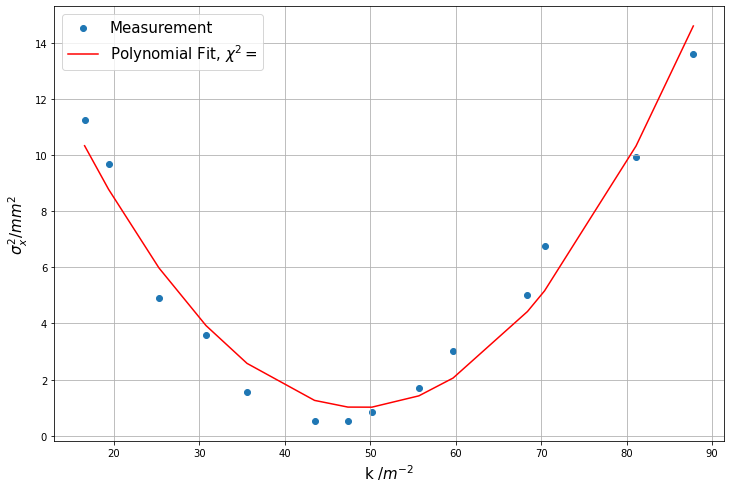

In [225]:
#POLYNOMIAL FIT
plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(polynomialfit,kx[7:],(sigx**2)[7:])
plt.scatter(kx[7:],(sigx**2)[7:],label="Measurement")
plt.plot(kx[7:], polynomialfit(kx[7:], *popt6),c='red',label=r"Polynomial Fit, $\chi^2=$")
kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]
print(kmin,beamwidth)

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)

aa=popt6[0]
bb=popt6[1]
cc=popt6[2]
Daa=np.sqrt(pcov6[0][0])
Dbb=np.sqrt(pcov6[1][1])
Dcc=np.sqrt(pcov6[2][2])
Dbeamwidth=np.sqrt((-Dbb*bb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)

Mat=Matrix(kmin)
print(Mat)

em2=np.sqrt(beamwidth**2*((Mat[2]**2)*a-2*Mat[2]*Mat[3]*b+(Mat[3]**2)*c))
print(em2)

plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{x}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)

print(scipy.stats.chisquare((sigx**2)[7:], polynomialfit(kx[7:], *popt6))[0])
print(aa,Daa)
print(bb,Dbb)
print(cc,Dcc)
kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)
Dbeamwidth=np.sqrt((-Dbb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)
Dbeamwidth=np.sqrt((-Dbb*bb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)

w1=em2*Dbeamwidth/beamwidth
w2=(beamwidth**2)*(Mat[2]**2)/(em2*2)
w3=((beamwidth**2)*Mat[2]*Mat[3])/(em2)
w4=((beamwidth**2)*Mat[3]*Mat[3])/(2*em2)

print(np.sqrt(w1**2+w2**2+w3**2+w4**2))

[ 1.31419703 -0.87421019  6.71172736]
[[0.24034133 0.28454063 0.21826098]
 [0.28454063 0.39388401 0.33277263]
 [0.21826098 0.33277263 0.34329989]]
emittance 2.838360213881619
0.6258877236839211
0.6258877236839211
1.3575419447836325
1.3141970298779528 0.49024619377709944
-0.8742101874057444 0.6276017921407083
6.711727355166251 0.5859179905822611


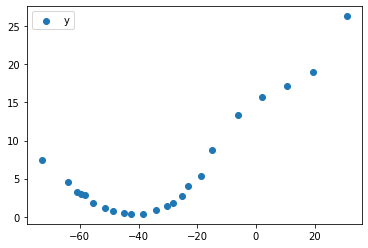

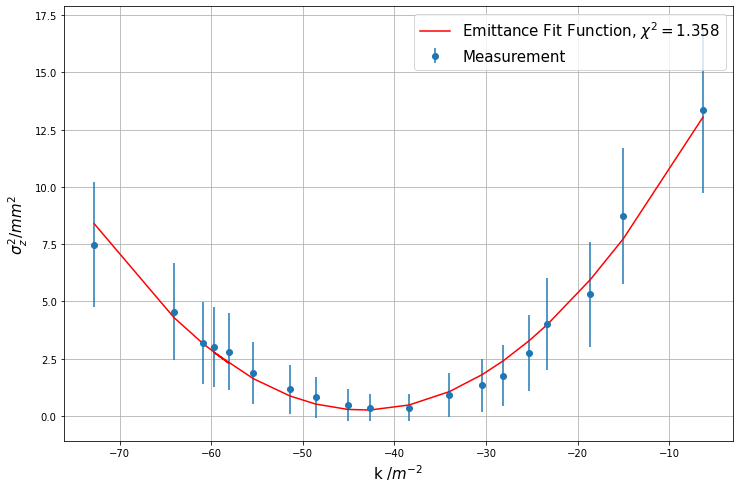

In [226]:
def ourfit(x,a,b,c):    
    L=0.074
    m11=[]
    m12=[]
    m21=[]
    m22=[]
    for i in range(len(x)):
        k=x[i]
        omega=np.sqrt(np.abs(k))*L
    
        M1=np.array([[1, 0.02+0.316+0.03925*2+0.03],
                     [0, 1]])

        #M2=np.array([[np.cos((omega/np.pi)*180),(1/np.sqrt(k))*np.sin((omega/np.pi)*180)],
        #             [-np.sqrt(k)*np.sin((omega/np.pi)*180),np.cos((omega/np.pi)*180)]])
        M2=np.array([[1,L],
                     [k*L,1]])
        M3=np.array([[1,0.06+0.04+0.316+0.03925*2+0.03+0.074+0.06+0.04+0.185+0.03925],
                     [0,1]])
        M=np.matmul(M1,np.matmul(M2,M3))
      
        m11.append(M[0][0])
        m12.append(M[0][1])
        m21.append(M[1][0])
        m22.append(M[1][1])
    
    return ((np.array(m11))**2)*a-2*(np.array(m11))*(np.array(m12))*b+(np.array(m12))**2*c


ky=np.array([-72.8,-64.1,-60.9, -58.1,-59.7,-55.4,    -51.4, -48.6   ,-45.1,-42.7,-38.4  ,-34.0,-30.4,-28.1,-25.3  ,-23.3,-18.6  ,-15.0,-6.3,2.0,10.7,19.4,30.8])
sigy=np.array([2.734,2.135,1.782, 1.673,1.735,1.364, 1.074, 0.896    ,0.687,0.603,0.6015   ,0.951,1.157,1.326,1.654   ,2.003,2.303  ,2.955,3.657,3.966,4.136,4.357,5.13])
errsigy=([0.0167,0.0113,0.0096,0.0084 ,0.0088,0.0066,   0.0055,0.0041   ,0.0036,0.0033,0.00242  ,0.0037,0.0043,0.0051,0.0066  ,0.0086,0.0101   ,0.0138,0.0182,0.0215,0.0263,0.0299,0.036])
plt.scatter(ky,np.array(sigy)**2,label="y")
plt.legend()
plt.figure(figsize=(12,8))
popt6, pcov6= curve_fit(ourfit,ky[:-4],(sigy**2)[:-4])
plt.errorbar(ky[:-4],(sigy**2)[:-4],np.sqrt((sigy**2)[:-4]),fmt='o',label="Measurement")
plt.plot(ky[:-4], ourfit(ky[:-4], *popt6),c='red',label=r"Emittance Fit Function, $\chi^2=1.358$")


print(popt6)
print(pcov6)
print("emittance", np.sqrt(popt6[0]*popt6[2]-popt6[1]**2))

emittance=np.sqrt(popt6[0]*popt6[2]-popt6[1]**2)
a=popt6[0]
b=popt6[1]
c=popt6[2]
Da=np.sqrt(pcov6[0][0])
Db=np.sqrt(pcov6[1][1])
Dc=np.sqrt(pcov6[2][2])

error=np.sqrt((1/4)*(Da**2)*((c/emittance)**2)+(1/4)*(Dc**2)*((a/emittance)**2)+((b/emittance)**2)*(Db**2))
print(error)


error=np.sqrt((1/4)*(Da**2)*((c/emittance)**2)+(1/4)*(Dc**2)*((a/emittance)**2)+((b/emittance)**2)*(Db**2))
print(error)

plt.xlabel(r"k /$m^{-2}$",fontsize=15)
plt.ylabel(r"$\sigma_{z}^2 /mm^{2}$",fontsize=15)
plt.grid()
plt.legend(fontsize=15)
print(scipy.stats.chisquare(((sigy**2)[:-4]), ourfit(ky[:-4], *popt6))[0])
print(a,Da)
print(b,Db)
print(c,Dc)

-42.506640625624044 0.44310304081933793
(2.398170930098652, 1.2961069240844878, 3.145491406296179, 2.019925588491536)
3.1797451753187977
0.008168105696733046 0.00030900784453330855
0.6943974668862882 0.027832195688798408
15.201354828958902 0.5747217323325884
-42.506640625624044 2.342759655397712
0.44310304081933793 1.882726728986607
10.260278649214115
0.00030900784453330855
10.260278649214115


/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3290/3663203587.py:4: RuntimeWarning: invalid value encountered in sqrt
  omega=np.sqrt(k)*L


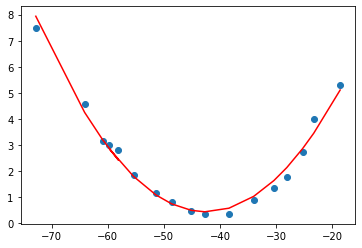

In [210]:
#POLYNOMIAL FIT
popt6, pcov6= curve_fit(polynomialfit,ky[:-6],(sigy**2)[:-6])
plt.scatter(ky[:-6],(sigy**2)[:-6],label="Measurement")
plt.plot(ky[:-6], polynomialfit(ky[:-6], *popt6),c='red',label=r"Linear Fit,  $\alpha_x^{ideal}=  -31.315 \pm 3.523$ mrad")

kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]
print(kmin,beamwidth)

Mat=Matrix(kmin)

print(Mat)

em2=np.sqrt(beamwidth**2*((Mat[2]**2)*a-2*Mat[2]*Mat[3]*b+(Mat[3]**2)*c))
print(em2)

aa=popt6[0]
bb=popt6[1]
cc=popt6[2]
Daa=np.sqrt(pcov6[0][0])
Dbb=np.sqrt(pcov6[1][1])
Dcc=np.sqrt(pcov6[2][2])
print(aa,Daa)
print(bb,Dbb)
print(cc,Dcc)
kmin=-popt6[1]/(2*popt6[0])
beamwidth=-(popt6[1]**2)/(4*popt6[0])+popt6[2]

Dkmin=np.sqrt((-np.sqrt(pcov6[1][1])/(2*popt6[0]))**2+(np.sqrt(pcov6[0][0])*(popt6[1]/(2*popt6[0]**2)))**2)
print(kmin,Dkmin)
Dbeamwidth=np.sqrt((-Dbb/(2*aa))**2+(Daa*(bb**2)/(4*(aa**2)))**2+(Dcc)**2)
print(beamwidth,Dbeamwidth)

Dbeamwidth=1.428

w1=em2*Dbeamwidth/beamwidth
w2=(beamwidth**2)*(Mat[2]**2)/(em2*2)
w3=((beamwidth**2)*Mat[2]*Mat[3])/(em2)
w4=((beamwidth**2)*Mat[3]*Mat[3])/(2*em2)

print(np.sqrt(w1**2+w2**2+w3**2+w4**2))
print(Daa)
w1=em2*Dbeamwidth/beamwidth
w2=(beamwidth**2)*(Mat[2]**2)/(em2*2)
w3=((beamwidth**2)*Mat[2]*Mat[3])/(em2)
w4=((beamwidth**2)*Mat[3]*Mat[3])/(2*em2)

print(np.sqrt(w1**2+w2**2+w3**2+w4**2))